<a href="https://colab.research.google.com/github/Jhansi-27/CE888/blob/main/Copy_of_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First CNN model for MNIST Dataset

* MNIST Dataset is ''Hello World'' of Image Recognition

* [Dataset HomePage](http://yann.lecun.com/exdb/mnist/)

* History of MNIST Dataset [Watch here](https://www.youtube.com/watch?v=oKzNUGz21JM)


---
The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a 
test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

![Kitten](https://camo.githubusercontent.com/01c057a753e92a9bc70b8c45d62b295431851c09cffadf53106fc0aea7e2843f/687474703a2f2f692e7974696d672e636f6d2f76692f3051493378675875422d512f687164656661756c742e6a7067)


# Let's start building our first CNN Model

In [1]:
from keras import layers
from keras import models

Importantly, a convnet takes as input tensors of shape (image_height, image_width,
image_channels) (not including the batch dimension). In this case, we’ll configure
the convnet to process inputs of size (28, 28, 1), which is the format of MNIST
images. We’ll do this by passing the argument input_shape=(28, 28, 1) to the first
layer.

#### Instantiating a small convnet

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


#### Adding a classifier on top of the convnet

In [3]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

### Training the convnet on MNIST images

In [4]:
from keras.datasets import mnist
from keras.utils import to_categorical

#### Load Data

In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels[0]

11493376/11490434 [==============================] - 0s 0us/step


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

#### compile and fit model 

In [6]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=2, batch_size=64, validation_split=0.2)

Epoch 1/2
750/750 [==============================] - 35s 5ms/step - loss: 0.4447 - accuracy: 0.8552 - val_loss: 0.0894 - val_accuracy: 0.9732
Epoch 2/2
750/750 [==============================] - 4s 5ms/step - loss: 0.0559 - accuracy: 0.9825 - val_loss: 0.0467 - val_accuracy: 0.9862


#### evaluate model

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 1s 3ms/step - loss: 0.0358 - accuracy: 0.9876


0.9876000285148621

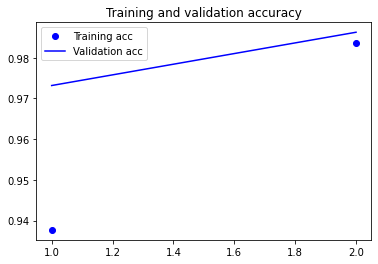

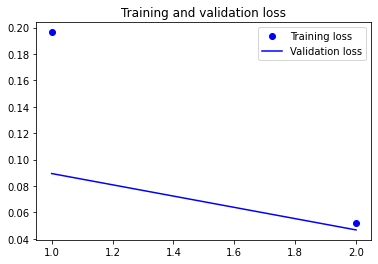

In [9]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Task 1

Change the activation function and other parameters such as optimizer to see the effect on the network and it's performance. If possible create a grid search. 

In [13]:
# Write code here
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from keras.wrappers.scikit_learn import KerasClassifier

In [10]:
def create_model():
	# create model
	
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
	# Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model



In [18]:
adam_model = create_model()
adam_model.fit(train_images,train_labels, epochs=2, batch_size=64, validation_split=0.2)

test_loss, test_acc = adam_model.evaluate(test_images, test_labels)
test_acc

Epoch 1/2
750/750 [==============================] - 4s 5ms/step - loss: 0.5151 - accuracy: 0.8368 - val_loss: 0.0738 - val_accuracy: 0.9770
Epoch 2/2
313/313 [==============================] - 1s 3ms/step - loss: 0.0472 - accuracy: 0.9838


0.9837999939918518

In [14]:
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [60, 80, 100]
epochs = [5,10]
param_grid = dict(batch_size=batch_size, epochs=epochs)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(train_images,train_labels)

# summarize results
print("Best score : %f obtained using %s" % (grid_result.best_score_, grid_result.best_params_),"\n")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best: 0.988400 using {'batch_size': 60, 'epochs': 10}
0.985417 (0.003115) with: {'batch_size': 60, 'epochs': 5}
0.988400 (0.000471) with: {'batch_size': 60, 'epochs': 10}
0.986450 (0.000860) with: {'batch_size': 80, 'epochs': 5}
0.986267 (0.002817) with: {'batch_size': 80, 'epochs': 10}
0.986117 (0.001822) with: {'batch_size': 100, 'epochs': 5}
0.988267 (0.001043) with: {'batch_size': 100, 'epochs': 10}


In [17]:
adam_model2 = create_model()
adam_model2.fit(train_images,train_labels, epochs=10, batch_size=60, validation_split=0.2)
test_loss, test_acc = adam_model2.evaluate(test_images, test_labels)
test_acc

Epoch 1/10
800/800 [==============================] - 4s 4ms/step - loss: 0.4845 - accuracy: 0.8490 - val_loss: 0.0675 - val_accuracy: 0.9799
Epoch 2/10
800/800 [==============================] - 3s 4ms/step - loss: 0.0666 - accuracy: 0.9791 - val_loss: 0.0524 - val_accuracy: 0.9848
Epoch 3/10
800/800 [==============================] - 3s 4ms/step - loss: 0.0426 - accuracy: 0.9871 - val_loss: 0.0673 - val_accuracy: 0.9797
Epoch 4/10
800/800 [==============================] - 3s 4ms/step - loss: 0.0329 - accuracy: 0.9897 - val_loss: 0.0408 - val_accuracy: 0.9881
Epoch 5/10
800/800 [==============================] - 3s 4ms/step - loss: 0.0249 - accuracy: 0.9921 - val_loss: 0.0364 - val_accuracy: 0.9893
Epoch 6/10
800/800 [==============================] - 3s 4ms/step - loss: 0.0178 - accuracy: 0.9940 - val_loss: 0.0502 - val_accuracy: 0.9860
Epoch 7/10
800/800 [==============================] - 3s 4ms/step - loss: 0.0179 - accuracy: 0.9946 - val_loss: 0.0568 - val_accuracy: 0.9854
Epoch 

0.9900000095367432

In [16]:
from keras.layers import LeakyReLU
activations = ['relu','tanh']

for act_function in activations:
  print(f"********** activation function : {act_function} ************** \n")
  model1 = models.Sequential()
  model1.add(layers.Conv2D(32, (3, 3), activation=act_function, input_shape=(28, 28, 1)))
  model1.add(layers.MaxPooling2D((2, 2)))
  model1.add(layers.Conv2D(64, (3, 3), activation=act_function))
  model1.add(layers.MaxPooling2D((2, 2)))
  model1.add(layers.Conv2D(64, (3, 3), activation=act_function))
  model1.add(layers.Flatten())
  model1.add(layers.Dense(64, activation=act_function))
  model1.add(layers.Dense(10, activation='softmax'))

  # Compile model
  optimizers = ['adam','SGD','adaGrad']
  for optimizer in optimizers:
    print(optimizer, ":\n")
    model1.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    history = model1.fit(train_images,train_labels, epochs=10, batch_size=60, validation_split=0.2)
    print(history,"\n")

********** activation function : relu ************** 

adam :

Epoch 1/10
800/800 [==============================] - 4s 5ms/step - loss: 0.4684 - accuracy: 0.8547 - val_loss: 0.0737 - val_accuracy: 0.9781
Epoch 2/10
800/800 [==============================] - 3s 4ms/step - loss: 0.0641 - accuracy: 0.9803 - val_loss: 0.0572 - val_accuracy: 0.9837
Epoch 3/10
800/800 [==============================] - 3s 4ms/step - loss: 0.0434 - accuracy: 0.9861 - val_loss: 0.0422 - val_accuracy: 0.9872
Epoch 4/10
800/800 [==============================] - 3s 4ms/step - loss: 0.0313 - accuracy: 0.9899 - val_loss: 0.0472 - val_accuracy: 0.9857
Epoch 5/10
800/800 [==============================] - 3s 4ms/step - loss: 0.0241 - accuracy: 0.9923 - val_loss: 0.0399 - val_accuracy: 0.9892
Epoch 6/10
800/800 [==============================] - 3s 4ms/step - loss: 0.0168 - accuracy: 0.9946 - val_loss: 0.0507 - val_accuracy: 0.9856
Epoch 7/10
800/800 [==============================] - 3s 4ms/step - loss: 0.0163 - ac

In [22]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation=act_function))
model1.add(layers.Dense(10, activation='softmax'))

model1.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
model1.fit(train_images,train_labels, epochs=10, batch_size=60, validation_split=0.2)

Epoch 1/10
800/800 [==============================] - 4s 4ms/step - loss: 1.5017 - accuracy: 0.5780 - val_loss: 0.3016 - val_accuracy: 0.9145
Epoch 2/10
800/800 [==============================] - 3s 4ms/step - loss: 0.2905 - accuracy: 0.9179 - val_loss: 0.2022 - val_accuracy: 0.9435
Epoch 3/10
800/800 [==============================] - 3s 4ms/step - loss: 0.1958 - accuracy: 0.9438 - val_loss: 0.1509 - val_accuracy: 0.9588
Epoch 4/10
800/800 [==============================] - 3s 4ms/step - loss: 0.1506 - accuracy: 0.9565 - val_loss: 0.1227 - val_accuracy: 0.9671
Epoch 5/10
800/800 [==============================] - 3s 4ms/step - loss: 0.1225 - accuracy: 0.9651 - val_loss: 0.1101 - val_accuracy: 0.9696
Epoch 6/10
800/800 [==============================] - 3s 4ms/step - loss: 0.1038 - accuracy: 0.9716 - val_loss: 0.0965 - val_accuracy: 0.9727
Epoch 7/10
800/800 [==============================] - 3s 4ms/step - loss: 0.0923 - accuracy: 0.9726 - val_loss: 0.0888 - val_accuracy: 0.9741
Epoch 

In [23]:
test_loss, test_acc = model1.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 1s 3ms/step - loss: 0.0634 - accuracy: 0.9828


0.9828000068664551